In [28]:
import pandas as pd
import pickle

def read_df_list(pickle_file):
    with open(pickle_file, 'rb') as f:
        df_list = pickle.load(f)
    return df_list

def save_df_list(df_list, pickle_file):
    with open(pickle_file, 'wb') as f:
        pickle.dump(df_list, f)
    return


In [29]:
from convokit import Corpus, Speaker, Utterance, Conversation, download
import os

path = "C:/Users/L/.convokit/downloads/"
os.environ['http_proxy'] = 'http://localhost:7890'
os.environ['https_proxy'] = 'http://localhost:7890'

def load_dfs(corpus):
    speakers = corpus.get_speakers_dataframe().drop(columns=['vectors'])
    
    conversations = corpus.get_conversations_dataframe().drop(columns=['vectors'])
    utterances = corpus.get_utterances_dataframe().drop(columns=['vectors'])
    # print(type(speakers), type(conversations), type(utterances))
    return speakers, conversations, utterances


In [30]:
corpus = Corpus(filename=path+'conversations-gone-awry-cmv-corpus')
utterances_df = load_dfs(corpus)[2]

In [31]:
print(utterances_df['meta.subreddit'].unique())

['changemyview']


In [32]:
df_list_full = read_df_list('combat_df_list_imms_1_full.pkl')
flattened_df_list= [df for df_list in df_list_full for df in df_list]

def add_SpaCy(df_list, utt_df):
    parsed = utt_df[['meta.parsed']]
    
    for df in df_list:
        common_indices = df.index.intersection(parsed.index)
        df.loc[common_indices, 'meta.parsed'] = parsed.loc[common_indices, 'meta.parsed']
    
    return df_list

flattened_df_list = add_SpaCy(flattened_df_list, utterances_df)
print(flattened_df_list[0])

                                                      text  \
id                                                           
cuedywn  Twin studies studies suggest that about 80 per...   
czb942p  Sorry Perpetualjoke, your comment has been rem...   
czbbocu  Are you kidding me?You decided to remove it af...   
czbdh6q  You decided to edit it after 5 months.  Why wo...   
czbe470  I just can't believe you are browsing 5 month ...   
czbe8el  No, we have an automoderator that checks for r...   

                                                     imm_1  imm_1_check  \
id                                                                        
cuedywn  ":\n"Research into twin studies indicates that...         True   
czb942p  "I apologize for the mistake, Perpetualjoke. I...         True   
czbbocu  "Five months wasn't even enough time to get ac...         True   
czbdh6q  "The silence was deafening, so I took the init...         True   
czbe470  "I'm taken aback that you'd assume the worst

In [33]:
concated = pd.concat(flattened_df_list, ignore_index=False)
refused_utt_df = concated[concated['imm_1_check'] == False]
accepted_utt_df = concated[concated['imm_1_check'] == True]
print(refused_utt_df.head(5)['text'].values)

["I'm sorry but we are going to have to agree to disagree. You are right about one thing, women are socialized to be delicate and beautiful and keep our bodily functions to ourselves. I'm actually okay with that, and prefer to continue in that manner. I like to appear attractive to the opposite sex, and would rather certain private functions be left strictly to my sex.  There is absolutely no convincing you can do to change my mind that doing these things with men nearby is a great idea. Sex partitioned bathrooms are fine by me! If people want unisex toilets they can install one single stall private toilet, but keep the multi stall bathrooms the way they are, thanks! "
 "I fail to see how this is representative of a rape culture. Attempted penatration was included in these numbers meaning no rape actually occred, just unwanted advances which were shut down. If 16% of women responded they were penatrated against their will then yes, such would be evidence of rape culture, but for all we

In [34]:
print(refused_utt_df['text'].values[3])

As with all arguments for rape culture, let's shift the crime to something less emotionally charged and see if it holds weight.

If there was a 90% chance you'd get away with it (source please, wikipedia says 8-12% of claims are unfounded) would you beat that coworker you don't like so bad he ended up in the hospital?

Why not!  You'll probably get away with it!

Perhaps there is more to what makes a person rape than "will I get away with it?"

If a cop pulls you over and searches your car under suspicion that you're trafficking drugs, but doesn't find any... Is it more likely that he was mistaken/you weren't trafficking drugs or that you got away with trafficking drugs?

Once upon a time, it was "innocent until proven guilty" but with rape accusations its either he's found guilty or he got away with it.

RAINN says you're wrong.  They're legit enough for me, why not for you?


In [35]:
# 使用spacy进行分词, 去除停用词, 词干提取
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
text = refused_utt_df['text'].values[3]

doc = refused_utt_df['meta.parsed'].values[3]
print(doc)
print(text)
stemmer = PorterStemmer()

processed_sentences = []
for sentence in doc:
    processed_tokens = []
    for token_data in sentence['toks']:
        token = token_data['tok']
        if token.lower() not in stop_words:
            processed_tokens.append(stemmer.stem(token.lower()))
    processed_sentences.append(" ".join(processed_tokens))

# 将处理后的 token 重新组合成一个字符串
processed_text = "\n".join(processed_sentences)

print("处理后的文本:", processed_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[{'rt': 8, 'toks': [{'tok': 'As', 'tag': 'IN', 'dep': 'prep', 'up': 8, 'dn': [1]}, {'tok': 'with', 'tag': 'IN', 'dep': 'prep', 'up': 0, 'dn': [3]}, {'tok': 'all', 'tag': 'DT', 'dep': 'det', 'up': 3, 'dn': []}, {'tok': 'arguments', 'tag': 'NNS', 'dep': 'pobj', 'up': 1, 'dn': [2, 4]}, {'tok': 'for', 'tag': 'IN', 'dep': 'prep', 'up': 3, 'dn': [6]}, {'tok': 'rape', 'tag': 'NN', 'dep': 'compound', 'up': 6, 'dn': []}, {'tok': 'culture', 'tag': 'NN', 'dep': 'pobj', 'up': 4, 'dn': [5]}, {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 8, 'dn': []}, {'tok': 'let', 'tag': 'VB', 'dep': 'ROOT', 'dn': [0, 7, 10, 24]}, {'tok': "'s", 'tag': 'PRP', 'dep': 'nsubj', 'up': 10, 'dn': []}, {'tok': 'shift', 'tag': 'VB', 'dep': 'ccomp', 'up': 8, 'dn': [9, 12, 13, 18, 19]}, {'tok': 'the', 'tag': 'DT', 'dep': 'det', 'up': 12, 'dn': []}, {'tok': 'crime', 'tag': 'NN', 'dep': 'dobj', 'up': 10, 'dn': [11]}, {'tok': 'to', 'tag': 'IN', 'dep': 'prep', 'up': 10, 'dn': [14]}, {'tok': 'something', 'tag': 'NN', 'dep': 'pob

In [36]:
print(refused_utt_df.shape[0])
print(accepted_utt_df.shape[0])

2211
32905


In [37]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')


def process_text(text):
    doc = nlp(text)
    
    lemmatized_words = []
    
    for token in doc:
        if not token.is_stop and token.is_alpha:
            lemmatized_words.append(token.lemma_)
    
    word_freq = Counter(lemmatized_words)
    
    sorted_word_freq = dict(word_freq.most_common())
    
    return sorted_word_freq


text = "He is running faster than his friend. She enjoys playing football, and they both love running."

word_bag = process_text(text)

print("Word Bag:", word_bag)

Word Bag: {'run': 2, 'fast': 1, 'friend': 1, 'enjoy': 1, 'play': 1, 'football': 1, 'love': 1}


In [38]:
# plot refuse frequency
# load combat_df_list_imms_1_full.pkl
# flatten the list
# for each dataframe in the list, count the number of refused utterances, and the frequency of refused utterances
# plot the frequency of refused utterances

import matplotlib.pyplot as plt
df_list_full = read_df_list('combat_df_list_imms_1_full.pkl')
flattened_df_list = [df for df_list in df_list_full for df in df_list]


In [61]:
def add_refuse_rate(df):
    refused_utt_df = df[df['imm_1_check'] == False]
    refused_rate = refused_utt_df.shape[0] / df.shape[0]
    df['refuse']= len(df)*[(refused_rate, refused_utt_df.shape[0], df.shape[0])]
    # print(df['refuse'][0])
    return df

flattened_df_list = [add_refuse_rate(df) for df in flattened_df_list]
refuse_list = [x['refuse'].iloc[0] for x in flattened_df_list]
print(sorted(refuse_list, key=lambda x: x[0], reverse=True))

7139
[(1.0, 3, 3), (1.0, 3, 3), (1.0, 7, 7), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 3, 3), (1.0, 4, 4), (1.0, 3, 3), (1.0, 5, 5), (1.0, 3, 3), (1.0, 3, 3), (0.8333333333333334, 5, 6), (0.8333333333333334, 5, 6), (0.8, 4, 5), (0.8, 4, 5), (0.8, 4, 5), (0.8, 8, 10), (0.8, 4, 5), (0.8, 4, 5), (0.8, 4, 5), (0.8, 4, 5), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.75, 3, 4), (0.7142857142857143, 5, 7), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 4, 6), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 2, 3), (0.6666666666666666, 4, 6), (0.6666666666666666, 2, 3), (0.66666666

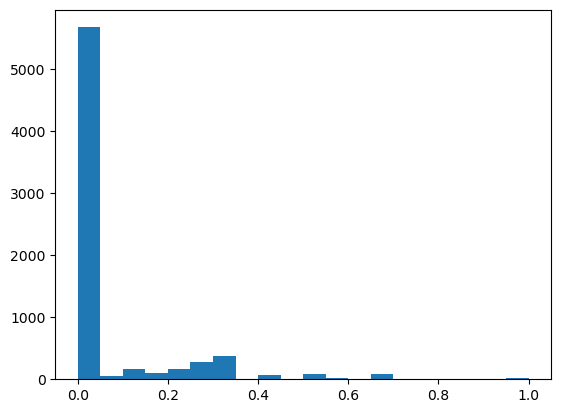

In [62]:
plt.hist([x[0] for x in refuse_list], bins=20)
plt.show()

In [66]:
def sort_condition_flatten(df_list, sort_condition):
    ls=[]
    for df in df_list:
        if sort_condition(df):
            ls.append(df)
    return ls

def refuse_rate_condition(df):
    refused_utt_df = df[df['imm_1_check'] == False]
    refused_rate = refused_utt_df.shape[0] / df.shape[0]
    total_row = df.shape[0]
    return refused_rate > 0.3 and total_row > 4

sorted_df_list = sort_condition_flatten(flattened_df_list, refuse_rate_condition)
print(len(sorted_df_list))

204


In [67]:
def merge_word_bag_list(word_bag_list):
    merged_word_bag = {}
    for word_bag in word_bag_list:
        for word, freq in word_bag.items():
            if word in merged_word_bag:
                merged_word_bag[word] += freq
            else:
                merged_word_bag[word] = freq
    return merged_word_bag

word_bag_list = [merge_word_bag_list([process_text(row['text']) for ind, row in df.iterrows()]) for df in sorted_df_list]
# corpus = [list(doc.items()) for doc in word_bag_list]
# print(corpus[0])

[('say', 8), ('stereotype', 6), ('tomboy', 2), ('woman', 3), ('manly', 4), ('fact', 3), ('racial', 4), ('predefine', 1), ('gender', 1), ('huge', 1), ('range', 1), ('variability', 1), ('type', 1), ('crazy', 1), ('think', 1), ('hyper', 1), ('feminine', 1), ('stupid', 1), ('able', 1), ('thing', 1), ('call', 1), ('butch', 1), ('like', 3), ('opposite', 1), ('want', 1), ('individualism', 1), ('boy', 4), ('act', 3), ('accord', 2), ('factually', 2), ('female', 2), ('different', 2), ('race', 2), ('fit', 2), ('regardless', 2), ('non', 2), ('blood', 2), ('gross', 2), ('male', 6), ('gt', 2), ('understand', 4), ('transgendere', 1), ('work', 1), ('extrapolate', 1), ('let', 1), ('ask', 1), ('question', 1), ('know', 6), ('penis', 3), ('ball', 3), ('chromosome', 5), ('cum', 2), ('extra', 1), ('package', 1), ('long', 6), ('accident', 2), ('lose', 1), ('ejaculate', 1), ('vagina', 1), ('secondary', 1), ('sex', 1), ('characteristic', 1), ('associate', 1), ('breast', 1), ('hourglass', 1), ('figure', 1), ('s

In [68]:
import gensim
import gensim.corpora as corpora

dictionary = corpora.Dictionary(word_bag_list)

corpus = [dictionary.doc2bow(doc) for doc in word_bag_list]

# 创建并训练LDA模型
num_topics = 2  # 设定你想要的主题数量
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# 打印每个主题的词语及其权重
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.005*"people" + 0.005*"think" + 0.004*"like" + 0.004*"say" + 0.004*"want" + 0.003*"right" + 0.003*"know" + 0.003*"thing" + 0.003*"woman" + 0.003*"mean"
Topic 2: 0.005*"people" + 0.004*"like" + 0.004*"think" + 0.004*"say" + 0.004*"way" + 0.003*"go" + 0.003*"point" + 0.003*"want" + 0.003*"thing" + 0.003*"mean"


In [74]:
stop_words = set(['people', 'think', 'like', 'say', 'want', 'know', 'right', 'way', 'time', 'gt', 'person', 'get', 'try', 'thing', 'point'])
filtered_bag_of_words_list = []
def filter_stop_words(word_bag, stop_words):
    return {word: freq for word, freq in word_bag.items() if word not in stop_words}

for doc in word_bag_list:
    filtered_bag_of_words_list.append(filter_stop_words(doc, stop_words))
    

In [75]:
dictionary = corpora.Dictionary(filtered_bag_of_words_list)

corpus = [dictionary.doc2bow(doc) for doc in word_bag_list]

# 创建并训练LDA模型
num_topics = 2  # 设定你想要的主题数量
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# 打印每个主题的词语及其权重
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.003*"go" + 0.003*"woman" + 0.003*"make" + 0.003*"look" + 0.003*"mean" + 0.003*"find" + 0.003*"sex" + 0.003*"man" + 0.003*"yes" + 0.003*"bad"
Topic 2: 0.004*"mean" + 0.003*"good" + 0.003*"go" + 0.003*"woman" + 0.003*"fact" + 0.003*"life" + 0.002*"rape" + 0.002*"come" + 0.002*"sure" + 0.002*"need"
